In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
#shape of the data
data.shape

(284807, 31)

In [5]:
#number of observations 
data.shape[0]

284807

In [6]:
#number of parameters 
data.shape[1]

31

In [12]:
# number of output unique values
data.Class.unique()

array([0, 1], dtype=int64)

In [13]:
# there is two class 0 and 1; 0 stands for legit and 1 stands for fraud transaction 
# number of each class
data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [56]:
data.groupby('Class').mean().T

Class,0,1
Time,94838.202258,80746.806911
V1,0.008258,-4.771948
V2,-0.006271,3.623778
V3,0.012171,-7.033281
V4,-0.007860,4.542029
V5,0.005453,-3.151225
V6,0.002419,-1.397737
V7,0.009637,-5.568731
V8,-0.000987,0.570636
V9,0.004467,-2.581123


In [16]:
data.Amount.describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [18]:
data.Amount[data.Class==0].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [19]:
data.Amount[data.Class==1].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [61]:
samp

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
3954,3579.0,0.729185,-1.482025,-0.284564,-0.237517,-0.979221,-0.458951,0.180632,-0.281292,-0.944700,...,-0.215013,-0.689255,-0.272534,0.169303,0.263602,1.083922,-0.109841,0.053253,334.96,0
253692,156363.0,2.193811,-1.545733,-0.289638,-1.403077,-1.778474,-0.688594,-1.402530,-0.219940,-0.998951,...,0.137836,0.964143,0.102420,0.098203,-0.175723,0.029479,0.046364,-0.032859,49.95,0
14304,25374.0,-1.889823,-0.822532,1.848958,-0.175435,1.912696,-1.770646,-0.349078,0.116201,-0.341485,...,-0.107583,-0.966692,0.088443,-0.158542,0.338305,0.043958,-0.079898,0.088226,0.99,0
170443,120188.0,1.915756,-0.120928,-1.268545,1.427432,0.867539,1.211602,-0.314912,0.351773,-0.892420,...,0.238459,0.712714,0.164829,-1.534771,-0.558441,2.495538,-0.173567,-0.114101,6.83,0
103816,68804.0,1.158741,0.194145,0.603404,1.220216,-0.668989,-1.083051,0.064805,-0.154644,0.183546,...,-0.044922,-0.207323,0.025963,0.665558,0.428432,-0.481092,0.014162,0.032352,29.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62747,50412.0,1.154504,0.076124,0.447523,0.528809,-0.366840,-0.379192,-0.107920,0.096529,-0.108989,...,-0.118502,-0.392036,0.129680,0.203867,0.153277,0.175734,-0.029596,0.002538,7.83,0
270067,163908.0,2.039333,-0.442181,-0.764447,0.073737,-0.021732,0.581850,-0.730913,0.176152,1.243868,...,0.159618,0.739097,-0.052678,-1.409818,0.058512,-0.142431,0.043782,-0.061827,0.01,0
189678,128508.0,1.945898,-2.472496,0.928434,-0.781389,-3.139030,0.146877,-2.463120,0.333474,0.802364,...,-0.008063,0.648314,0.194148,0.455867,-0.498603,-0.009011,0.092997,-0.011054,104.45,0
262711,160616.0,2.222422,-0.585140,-1.719587,-1.234503,0.132990,-0.538296,-0.206267,-0.255825,-1.085317,...,0.080780,0.148639,0.167206,0.304695,0.013917,-0.344277,-0.051891,-0.066843,17.99,0


C:\Users\Abdul Wajed Farhat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Amount'>

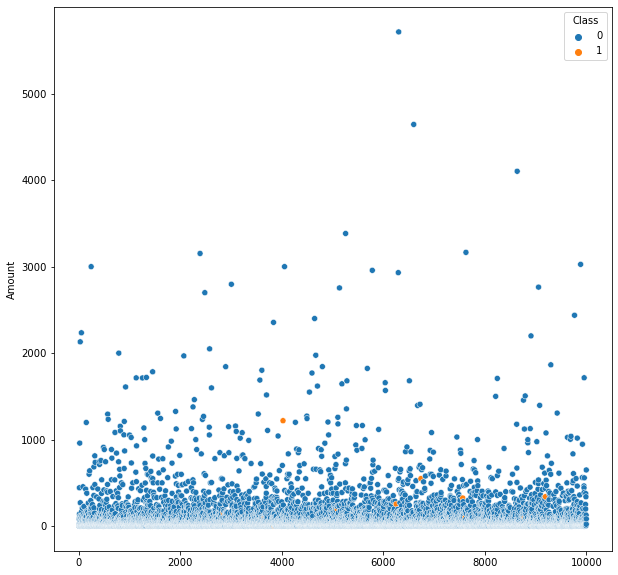

In [68]:
plt.figure(figsize=(10,10))
samp=data.sample(10000)
sns.scatterplot(range(1,10001),samp.Amount,hue=samp.Class,data=samp)

In [21]:
x=data.drop('Class',axis=1)
y=data.Class

In [22]:
# splitting the data into train and test
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=5)

In [25]:
x_train.shape

(213605, 30)

In [27]:
y_train[y_train==1]

6870      1
50537     1
70589     1
189587    1
58761     1
         ..
10484     1
223618    1
208651    1
258403    1
15225     1
Name: Class, Length: 371, dtype: int64

In [28]:
y_train[y_train==0]

160749    0
230086    0
105763    0
196675    0
52454     0
         ..
136592    0
232422    0
124605    0
20463     0
18638     0
Name: Class, Length: 213234, dtype: int64

In [30]:
y_test[y_test==0].count()

71081

In [31]:
y_test[y_test==1].count()

121

# Applying Logistic regression method

In [33]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()

In [34]:
log_model.fit(x_train,y_train)

C:\Users\Abdul Wajed Farhat\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
ypred=log_model.predict(x_test)

In [36]:
from sklearn.metrics import accuracy_score

In [38]:
accuracy_score(ypred,y_test)

0.9989747479003399

# Applying Knearest neighbors

In [51]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
score=[]
for i in range(1,11,2):
    KNC=KNeighborsClassifier(n_neighbors=i)
    KNC.fit(x_train,y_train)
    ypred2=KNC.predict(x_test)
    sc=accuracy_score(ypred2,y_test)
    score.append(sc)
    
acc_score={'KNeighbores':range(1,11,2),'acc_score':score}
acc_score=pd.DataFrame(acc_score)
acc_score

,KNeighbores,acc_score
0,1,0.998118
1,3,0.998427
2,5,0.998357
3,7,0.998343
4,9,0.998329
